# תרגיל 2:

## פתרון ידני:

### 6x + y = 12
### 3y + 2x = 20

### 6x + y = 12
### 2x + 3y = 20

In [ ]:
A = [6, 1]    X = [x]    B = [12]  
    [2, 3]        [y]        [20]

In [ ]:
det = 6*3 - (1*2) = 18-2

### det = 16

In [ ]:
adj = [d, -b]
      [-c, a]

### adj = 
###   [ 3, -1]
###   [-2, 6 ]

## A^-1 = 1/det(A) * adj(A)

In [ ]:
A^-1 = 1/16 * [ 3,-1]
              [-2, 6]

## X = A^-1 * B


In [ ]:
X =  [3/16, -1/16]  * [12]
     [-2/16, 6/16]    [20]

In [ ]:
X = [(3/16 * 12) + (-1/16 * 20)]
    [(-2/16 * 12) + (6/16 * 20)]

In [ ]:
X = [16/16]
    [96/16]

### X =
###   [1]
###   [6]

## x = 1, y = 6

# פתרון בקוד:

In [14]:
import numpy as np

def solve_linear_system(coefficients, constants):
    """
    Function to solve a system of linear equations with any number of unknowns
    
    :param coefficients: Coefficient matrix of the equations. nxn matrix
    :param constants: Vector of constant terms [b1, b2, ..., bn]
    :return: Solution of the system and details of calculation method
    """
    
    # Convert inputs to numpy arrays
    A = np.array(coefficients, dtype=float)
    b = np.array(constants, dtype=float)
    
   # Validate input dimensions
    n = b.shape[0]  # Number of equations/unknowns
    if A.shape != (n, n):
        raise ValueError(f"Input must be a system of {n} equations with {n} unknowns")
        
    results = {}
    
    det_A = np.linalg.det(A)
    
    if abs(det_A) < 1e-10:
        results["inverse"] = "Cannot compute inverse (singular matrix)"
    else:
         # Calculate inverse of coefficient matrix
        A_inv = np.linalg.inv(A)  # 1/det * adj = 1/det * [Cof^T}
        
        # Calculate solution x = A^(-1) * b
        solution = np.dot(A_inv, b)
        
        results["inverse"] = {
            "A_inverse": A_inv.tolist(),
            "solution": solution.tolist()
        }
       
    return results

# Example system:
# 3x + 2y = 14
# 2x + 5y = 19
### x – y = 8
### 3x + 2y = 24
coefficients = [[6, 1], [2, 3]]
constants = [12, 20]

results = solve_linear_system(coefficients, constants)

print("System of equations:")
print(f"{coefficients[0][0]}x + {coefficients[0][1]}y = {constants[0]}")
print(f"{coefficients[1][0]}x + {coefficients[1][1]}y = {constants[1]}")
print("\nResults:")

for method, result in results.items():
    if isinstance(result, dict):
        if "solution" in result:
            print(f"Solution: x = {result['solution'][0]:.2f}, y = {result['solution'][1]:.2f}")
        for key, value in result.items():
            if key != "solution":
                print(f"{key}: {value}")
    else:
        print(result)


System of equations:
6x + 1y = 12
2x + 3y = 20

Results:
Solution: x = 1.00, y = 6.00
A_inverse: [[0.1875, -0.0625], [-0.125, 0.375]]


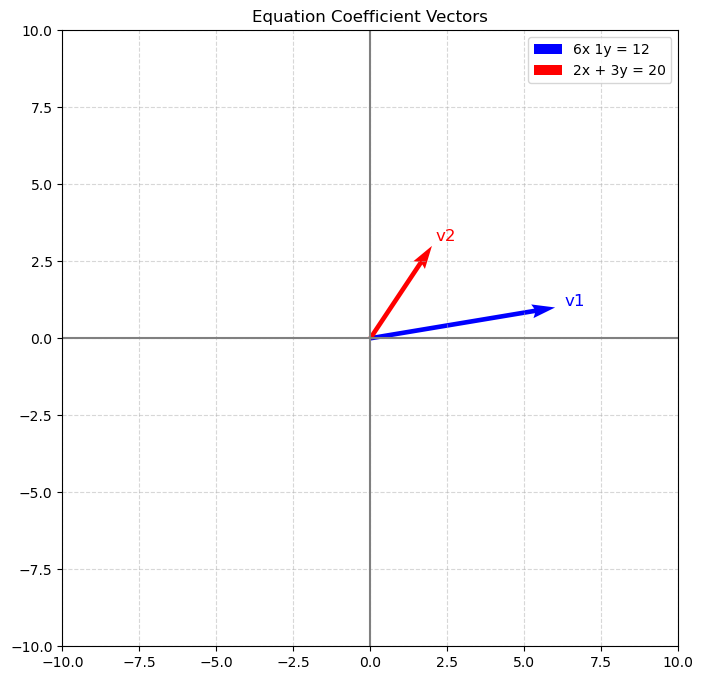

In [22]:

import matplotlib.pyplot as plt

def draw_equation_vectors(coefficients, constants):
    """
    Draws two 2D vectors representing the coefficients of two linear equations.
    """
    vector1 = np.array(coefficients[0])
    vector2 = np.array(coefficients[1])

    # Setup plot
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(0, color='gray')
    ax.axvline(0, color='gray')

    # Draw first vector
    ax.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label=f'{coefficients[0][0]}x {coefficients[0][1]}y = {constants[0]}')

    # Draw second vector
    ax.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='red', label=f'{coefficients[1][0]}x + {coefficients[1][1]}y = {constants[1]}')

    # Annotations
    ax.text(vector1[0]*1.05, vector1[1]*1.05, 'v1', color='blue', fontsize=12)
    ax.text(vector2[0]*1.05, vector2[1]*1.05, f'v2', color='red', fontsize=12)

    plt.title("Equation Coefficient Vectors")
    
    plt.legend()
    plt.show()

coefficients = [[6, 1], [2, 3]]
constants = [12, 20]
draw_equation_vectors(coefficients, constants)